<h2 style="font-size: 50px; font-weight: bold; color: black; margin-top: 20px;">
  Projeto : Emprestimentos
</h2>

Conteúdo

* Motivação
* Carregando os dados
* Exploração dos dados
* Análise exploratória de dados
   * CountPlot
   * Distribution Plot
   * Correlation
* Feature engineering
   * Valores faltantes
   * Transformação logaritmica
   * Label Encoder
* Modelo de Machine Learning 
   * Aprendizagem supervisado
      * Regressão logistíca
      * Naive Bayes
      * Árvore de decisão
* Resultado e conclusões
* Referências 

# Motivação

*A questão de conceder empréstimos é um desafio contínuo para as instituições financeiras e 
é crucial tomar decisões informadas para minimizar riscos financeiros e otimizar o processo 
de empréstimo.*
*Neste projeto construiremos modelos de Machine Learning (ML), aprendizagem supervisada, 
para prever quais clientes têm maior probabilidade de adquirir um empréstimo baseado em uma 
ampla gama de variáveis, histórico de crédito, renda, e outras informações relevantes. 
Ao utilizar esses modelos de ML poderemos ajudar instituições financeiras à reduzir 
perdas financieras, melhorar a eficiência do processo de tomada de decisão e oferecer 
um serviço mais personalizado aos clientes.*


# Carregando os dados

Para o desenvolmento deste projeto vamos utilizar dados de emprestimos disponíveis do site [[1]](https://www.kaggle.com/datasets/sazid28/home-loan)


| Variável | Descripção |
|---------| -------------- |
| Loan_ID | Unique Loan ID |
| Gender | Male/ Female | 
| Married | Applicant married (Y/N) |
| Dependents | Number of dependents |
| Education | Applicant Education (Graduate/ Under Graduate) |
| Self_Employed | Self employed (Y/N) |
| ApplicantIncome |  Applicant income |
| CoapplicantIncome |  Coapplicant income |
| LoanAmount | Loan amount in thousands |
| Loan_Amount_Term | Term of loan in months |
| Credit_History | credit history meets guidelines |
| Property_Area | Urban/ Semi Urban/ Rural |
| Loan_Status | Loan approved (Y/N) |

In [1]:
# Importando as bibliotecas 
# ==============================================================================
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # for data visualization
import seaborn as sns # Seaborn is a library for making statistical graphics in Python.
%matplotlib inline

In [2]:
# Carregando os dados
# ==============================================================================
datatrain = pd.read_csv("/kaggle/input/home-loan/train.csv")
datatest = pd.read_csv("/kaggle/input/home-loan/test.csv")

# Exploração dos dados

In [3]:
# Visualizando as 5 primeiras observações
# ============================================================================
datatrain.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
# A dimensão dos dados de treino e teste
# ==============================================================================
print(f"A dimensionalidade dos dados de treinamento é: {datatrain.shape}")
print(f"A dimensionalidade dos dados de teste é: {datatest.shape}")

A dimensionalidade dos dados de treinamento é: (614, 13)
A dimensionalidade dos dados de teste é: (367, 12)


In [5]:
# Info of data
# ==============================================================================
datatrain.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [6]:
# Conhecendo o tipo de dados 
# ==============================================================================
datatrain.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [7]:
# Removendo a coluna "Loan_ID"
# ==============================================================================
for df  in [datatrain, datatest]:
  df.drop("Loan_ID", axis = 1, inplace= True)

In [8]:
# Tipo de variável
# ==============================================================================
print("*"*23, "Variável categorica", "*"*23)
cat_var = datatrain.dtypes[datatrain.dtypes == "object"].index
print(cat_var, len(cat_var))
print("*"*23, "Variável númerica", "*"*23)
num_var = datatrain.dtypes[datatrain.dtypes != "object"].index
print(num_var, len(num_var))

*********************** Variável categorica ***********************
Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'Property_Area', 'Loan_Status'],
      dtype='object') 7
*********************** Variável númerica ***********************
Index(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History'],
      dtype='object') 5


In [9]:
# Valores faltantes
# ==============================================================================
datatrain.isnull().sum()

Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

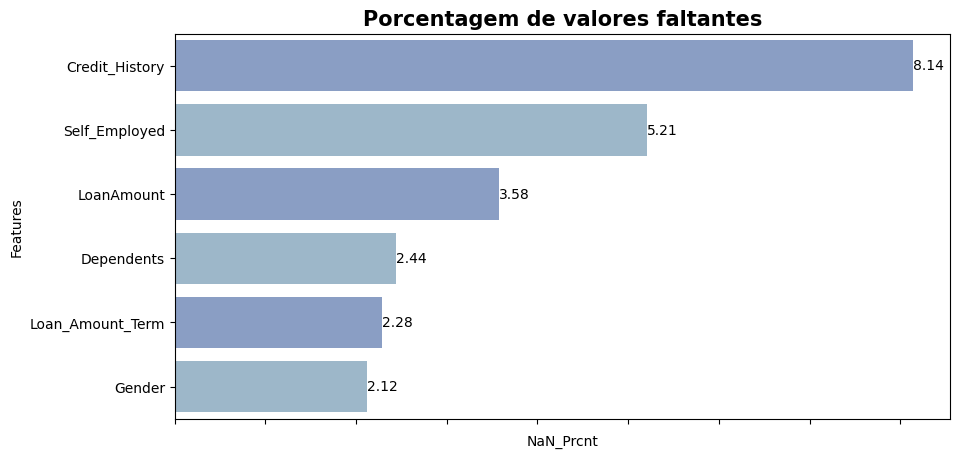

In [10]:
# Porcentagem de valores nulos
# ======================================================================================
nan_p = []
columns = datatrain.columns
for i in columns:
    prcnt = len(datatrain[i][datatrain[i].isna() == True]) / len(datatrain[i])*100
    nan_p.append(round(prcnt,2))

Nan_values = pd.DataFrame({'Features' : columns, 'NaN_Prcnt': nan_p}).sort_values(
             by = 'NaN_Prcnt', ascending = False)
Nan_values = Nan_values[Nan_values.NaN_Prcnt > 1]



# Gráfica dos valores faltantes
# ==========================================================================================
fig , ax = plt.subplots(figsize=(10, 5))
plt.title('Porcentagem de valores faltantes', size = 15, weight = "bold")
sns.barplot(x = Nan_values.NaN_Prcnt, y = Nan_values.Features, palette=["#809bce", "#95b8d1"])



# Codigo para criar as etiquetas
# ==========================================================================================
ax.set(xticklabels=[])
for i in ax.containers:
    ax.bar_label(i) #bar label
plt.show()

$$\underline{\text{Resumo da exploração dos dados}}$$

* Removimos a coluna Load_ID, ela é innecessaria para o desenvolvimento do projeto.
* O conjunto de dados de treinamento possue 614 observações e 12 variáveis.
* O conjunto de dados de treinamento possue 5 variáveis númericas ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History']
* O conjunto de dados de treinamento possue 7 variáveis categoricas ['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area', 'Loan_Status']
* O conjunto de dados possue valores faltantes.
* Neste projeto, a variável saída será Loan Status


# Análise exploratória de dados

# Análise univariante

A forma mais simples de analizar dados é examinar cada variável individualmente 
Para variáveis categoricas, podemos usar tabela de frequência ou gráfica de barras, a qual calcularam o número de cada categoria em uma variável particular.
Para variáveis numéricas, a densidade de probabilidade é usada para examinar a distribução da variável.


## Gráfica de frequências

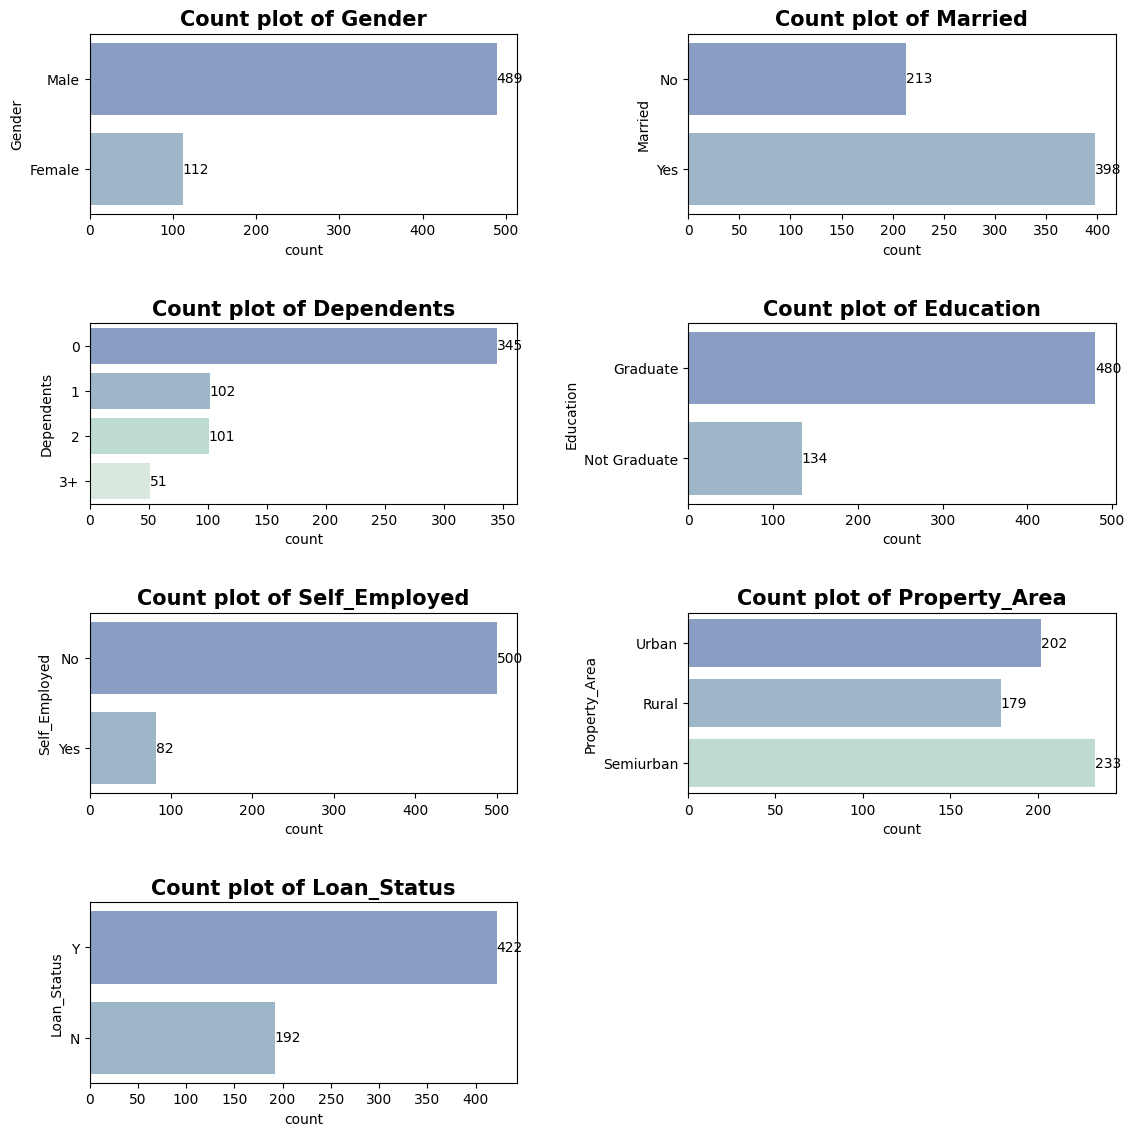

In [11]:
# Criando uma lista de cores para o gráfico
# =======================================================================
color = ["#809bce", "#95b8d1", "#b8e0d2", "#d6eadf" ] 



# Codigo para criar a gráfica de barras
# =======================================================================
fig,axes = plt.subplots(4,2,figsize = (12,12))
for idx, i in enumerate(cat_var):
  fig.tight_layout(pad = 3.0)
  row = idx // 2
  col = idx % 2  
  sns.countplot(y = i, data = datatrain,
                ax = axes[row, col], palette = color).set_title(
                f'Count plot of {i}', fontdict={'size': 15, 'weight': 'bold'})
  plt.xlabel(str(i))
  for j in axes[row,col].containers:
    axes[row,col].bar_label(j)
    


# Codigo para eliminar as gráficas desnecessárias
# =======================================================================
for i in range(len(cat_var),8):
    row = i // 2
    col = i % 2
    fig.delaxes(axes[row, col])

## Gráfico de distribuição

********************** ApplicantIncome **********************
ApplicantIncome has a skew 6.54 and a Kurtosis 60.54
********************** CoapplicantIncome **********************
CoapplicantIncome has a skew 7.49 and a Kurtosis 84.96
********************** LoanAmount **********************
LoanAmount has a skew 2.68 and a Kurtosis 10.4
********************** Loan_Amount_Term **********************
Loan_Amount_Term has a skew -2.36 and a Kurtosis 6.67
********************** Credit_History **********************
Credit_History has a skew -1.88 and a Kurtosis 1.55


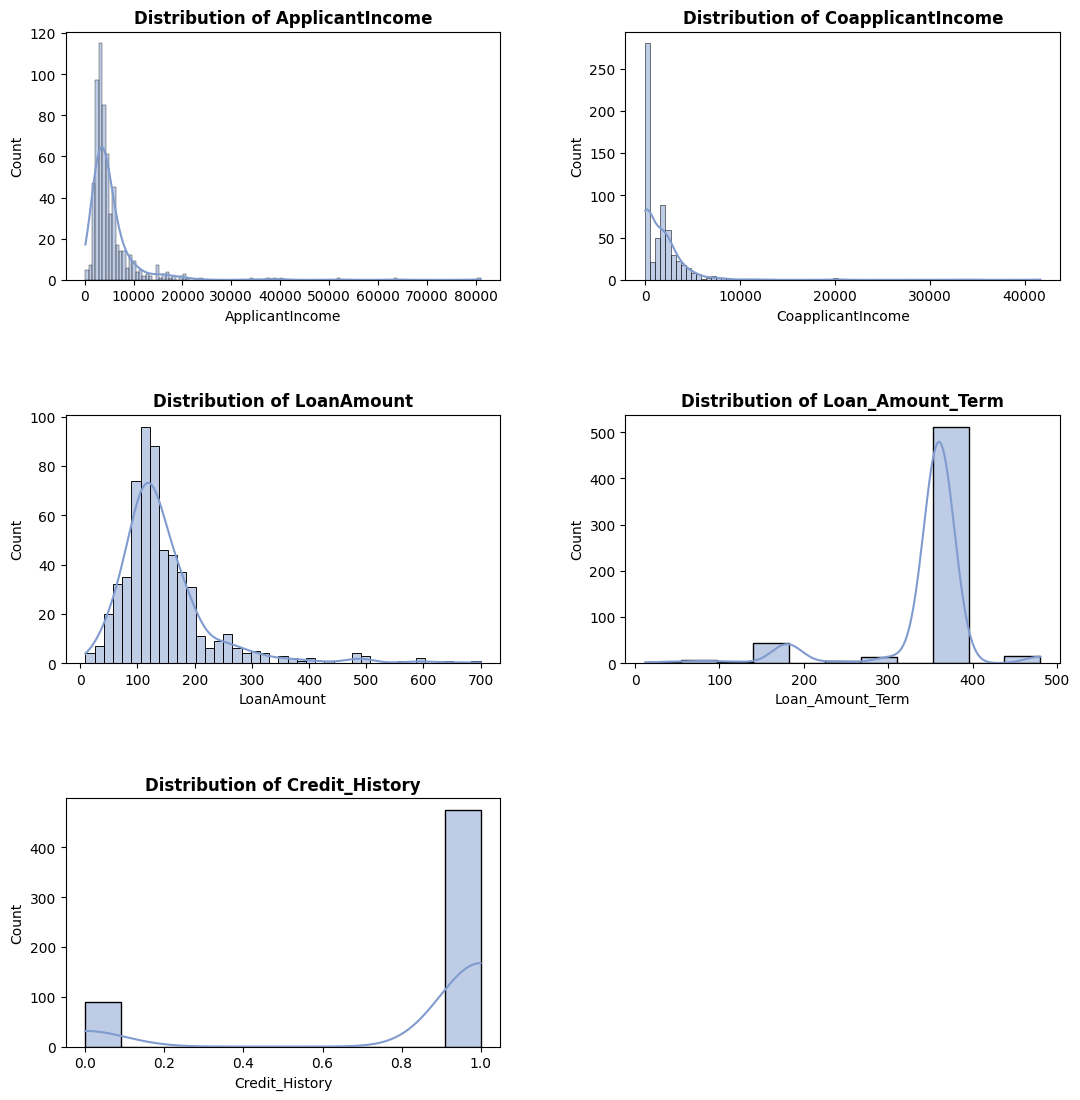

In [12]:
# Calculando o Skew e Kurtosi das variáveis numericas 
# ==============================================================================
for i in num_var:
  skew = datatrain[i].skew()
  kurt = datatrain[i].kurt()
  print("*"*22,i ,"*"*22)
  print(f"{i} has a skew {round(skew,2)} and a Kurtosis {round(kurt,2)}")
    
    
    
# Gráfica de distribução
# ==============================================================================
fig, axes = plt.subplots(3,2,figsize = (12,12))

for idx, i in enumerate(num_var):
  row = idx // 2
  col = idx % 2  
  fig.tight_layout(pad = 5.0)
  sns.histplot(datatrain[i], kde = True, color = "#809bce", ax = axes[row,col]).set_title(
      f'Distribution of {i}', fontdict={'size': 12, 'weight': 'bold'})



# Elimina qualquer gráfico não usado
# ===============================================================================
for i in range(len(num_var), 6):
    row = i // 2
    col = i % 2
    fig.delaxes(axes[row, col])

Podemos observar da gráfica de distribução mostrada acima que algumas variáveis númericas não possuem uma distribução normal.

# Feature Engineering

Nesta parte trataremos com os valores faltantes, antes de começar é importante comprender o seguinte: 
* Para o tratamento de valores faltantes do tipo númerico, para imputar os valores faltantes usaremos a média ou a mediana.
* Para o tratamento de valores faltantes do tipo categorico, para imputar os valores faltantes usaremos a moda.


In [13]:
# Tratamento de valores faltantes do tipo categorico
# ==============================================================================
for df in [datatrain, datatest]:
  for i in cat_var[0:-1]:
    df[i].fillna(df[i].mode()[0],inplace=True)

In [14]:
# Tratamento de valores faltantes do tipo númerico
# ==============================================================================
for df in [datatrain, datatest]:
  for i in num_var:
    df[i].fillna(df[i].median(),inplace=True)

In [15]:
# Checking the Null Values
# ==============================================================================
print("*"*19,"Null Values for Training Data", "*"*19)
print(datatrain.isnull().sum())
print("*"*20,"Null Values for Testing Data", "*"*20)
print(datatest.isnull().sum())

******************* Null Values for Training Data *******************
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64
******************** Null Values for Testing Data ********************
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
dtype: int64


## Transformação logaritmica

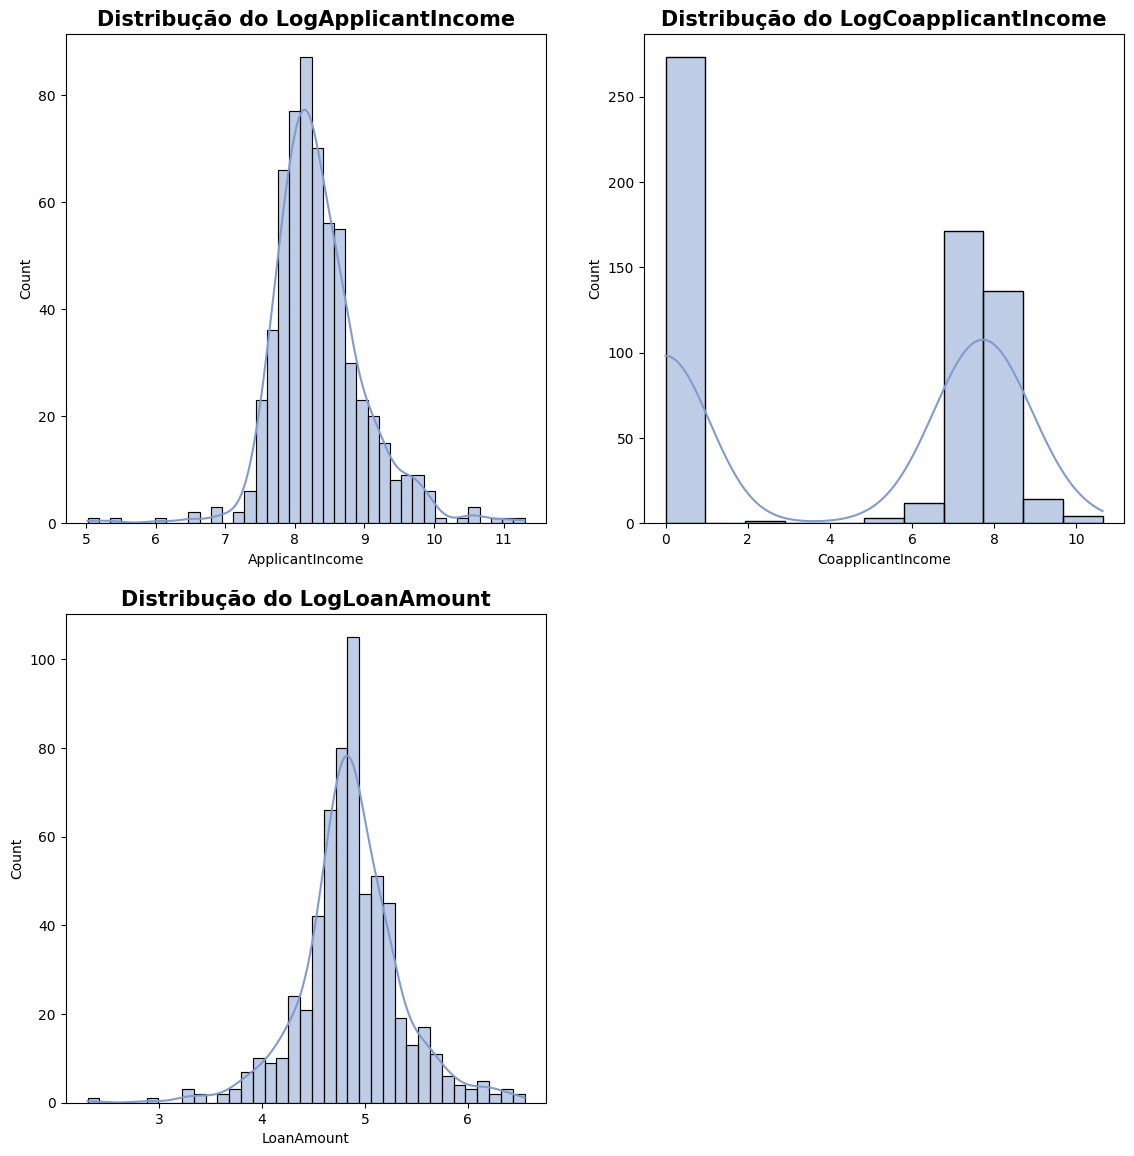

In [16]:
# Tomando o logaritmo
# ==============================================================================
Log = ["ApplicantIncome", "CoapplicantIncome", "LoanAmount"]
for df in [datatrain, datatest]:
  for i in Log:
    df[i] = np.log(df[i]+1)

fig, ax = plt.subplots(2,2, figsize=(12,12))
for idx, i in enumerate(Log):
  row = idx//2
  col = idx % 2
  fig.tight_layout(pad = 3.0)
  sns.histplot(datatrain[i], kde = True, ax = ax[row,col], color = "#809bce").set_title(
      f'Distribução do Log{i}', fontdict={'size': 15, 'weight': 'bold'})

fig.delaxes(ax[1,1])


## Label Encoder

In [17]:
Gen = {"Male": 0 ,"Female":1}
Mar = {"Yes": 0 , "No" : 1 }
Dep = {"0": 0 , "1": 1 , "2":2 , "3+" : 3}
Edu = {"Graduate": 1, "Not Graduate" : 0}
SeEm = {"No" : 1, "Yes" : 0 }
PoAr = {"Urban" : 2, "Semiurban" : 1, "Rural" : 0}
for df in [datatrain, datatest]:
  df["Gender"] = df["Gender"].map(Gen)
  df["Married"] = df["Married"].map(Mar)
  df["Dependents"] = df["Dependents"].map(Dep)
  df["Education"] = df["Education"].map(Edu)
  df["Self_Employed"] = df["Self_Employed"].map(SeEm)
  df["Property_Area"] = df["Property_Area"].map(PoAr)
    
    
datatrain['Loan_Status'].replace('N', 0,inplace=True)
datatrain['Loan_Status'].replace('Y', 1,inplace=True)

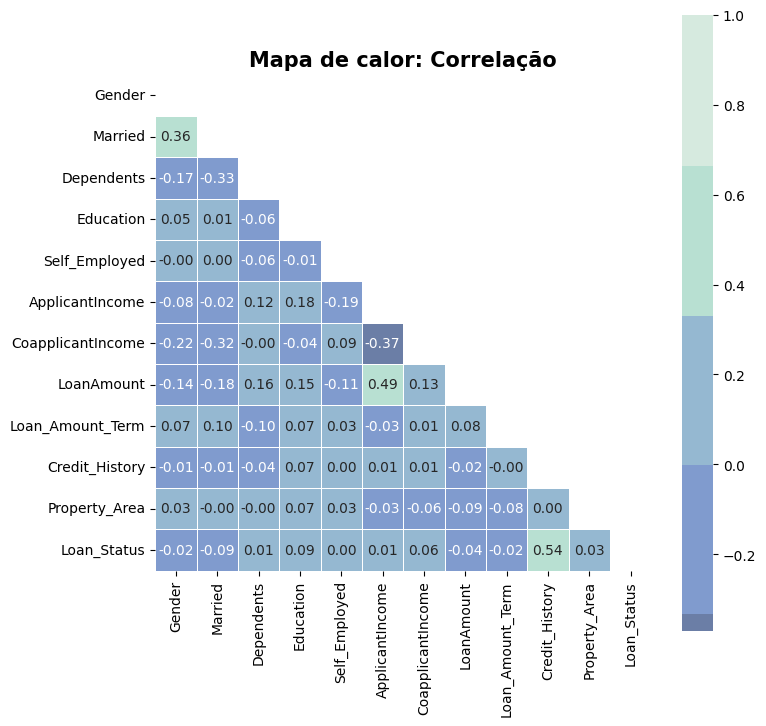

In [18]:
# Gráfica de correlação 
# ==============================================================================
plt.figure(figsize=(8,8))
corr = round(datatrain .corr(),2)
cmap = sns.color_palette(["#4b5179","#6b7ea6","#809bce", "#95b8d1", "#b8e0d2", "#d6eadf"])
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(corr,mask = mask,vmax=1.0, center=0, fmt='.2f', cmap=cmap,
                square=True, linewidths=.5, annot=True,
                ).set_title("Mapa de calor: Correlação", fontdict={'size': 15, 'weight': 'bold'})
plt.show()

O objetivo deste projecto é prever que cliente pode adquirir um emprestimo e quem não, para isso precisamos decompor os dados em dados de entrada `'Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History', 'Property_Area'` e dados de saída `Loan_status`


In [19]:
# Split data into input and output data
# ==============================================================================
X = datatrain.drop(["Loan_Status"], axis =1)
y = datatrain["Loan_Status"]

# 7. Modelos de Machine Learning

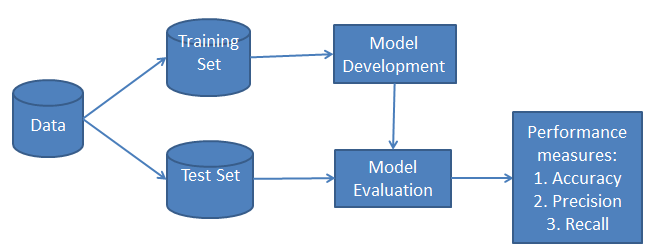

In [20]:
# Importando biblioteca para 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Implementação do modelo : Regressão Logistíca

In [21]:
# Construindo o modelo
# ==============================================================================
from sklearn.linear_model import LogisticRegression
modelLR = LogisticRegression(random_state= 1, max_iter=1000)



# Treinando o modelo
# ==============================================================================
modelLR.fit(X_train, y_train)



# Fazendo previsões
# ==============================================================================
ypredLR = modelLR.predict(X_test)

In [22]:
# Evaluando as métricas
# Importando as bibliotecas
# ==============================================================================
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
accLR = accuracy_score(y_test,ypredLR)
precisionLR = precision_score(y_test, ypredLR)
recallLR = recall_score(y_test, ypredLR)
f1LR = f1_score(y_test,ypredLR)
print('Accuracy_LR : %.3f' %accLR)
print('Precision_LR : %.3f' %precisionLR)
print('Recall_LR : %.3f' %recallLR)
print('F1-score_LR : %.3f' %f1LR)

Accuracy_LR : 0.789
Precision_LR : 0.760
Recall_LR : 0.988
F1-score_LR : 0.859


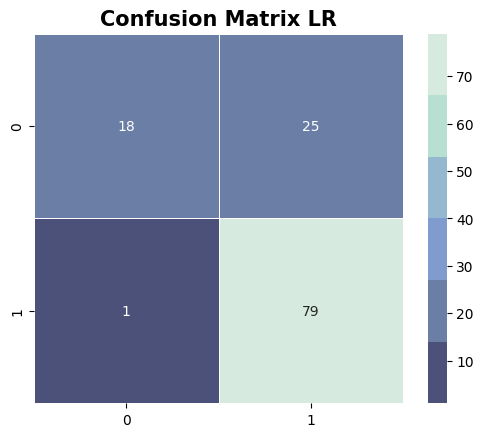

In [23]:
# Gráfica da matrix confusão
# ==============================================================================
from sklearn.metrics import confusion_matrix
cmLR = confusion_matrix(y_test, ypredLR)
sns.heatmap (cmLR, cmap = cmap, annot = True, square = True, linewidths = .5).set_title(
    "Confusion Matrix LR", fontdict={'size': 15, 'weight': 'bold'})
plt.show()

In [24]:
# Informação do modelo
# ==============================================================================
print("Intercepto:", modelLR.intercept_)
print("Coeficientes:", list(zip(X_train.columns, modelLR.coef_.flatten(),)))
print("Accuracy of trainin:", modelLR.score(X_train, y_train))

Intercepto: [-2.39380112]
Coeficientes: [('Gender', 0.27283879779389314), ('Married', -0.4718162786996487), ('Dependents', 0.12266813690048359), ('Education', 0.30491718529901396), ('Self_Employed', -0.12646405077168912), ('ApplicantIncome', 0.3290460532477213), ('CoapplicantIncome', 0.07683723522688532), ('LoanAmount', -0.635247486374658), ('Loan_Amount_Term', 0.0008973307988506278), ('Credit_History', 3.296863591627848), ('Property_Area', 0.09179465721972487)]
Accuracy of trainin: 0.814663951120163


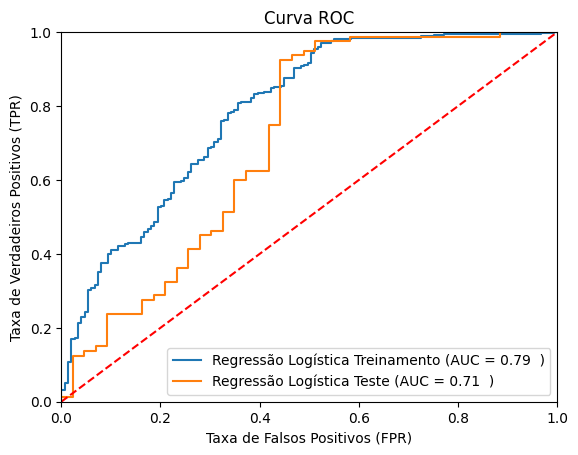

In [25]:
# Calcula as probabilidades previstas pelo modelo
# ====================================================================
from sklearn.metrics import roc_curve, roc_auc_score
ypredLR = modelLR.predict_proba(X_train)[:, 1]
y_pred_probLR = modelLR.predict_proba(X_test)[:, 1]



# Calcula a curva ROC
# ======================================================================
fprRLtrain, tprRLtrain, thresholdsRLtrain = roc_curve(y_train,ypredLR )
fprRL, tprRL, thresholdsRL = roc_curve(y_test, y_pred_probLR)



# Calcula a área sob a curva ROC (AUC-ROC score)
# ======================================================================
auc_scoreRLtrain = roc_auc_score(y_train, ypredLR)
auc_scoreRL = roc_auc_score(y_test, y_pred_probLR)



# Grafica a curva ROC
#========================================================================
plt.plot(fprRLtrain, tprRLtrain, label='Regressão Logística Treinamento (AUC = %0.2f  )' % auc_scoreRLtrain)
plt.plot(fprRL, tprRL, label='Regressão Logística Teste (AUC = %0.2f  )' % auc_scoreRL)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.xlabel('Taxa de Falsos Positivos (FPR)')
plt.ylabel('Taxa de Verdadeiros Positivos (TPR)')
plt.title('Curva ROC')
plt.legend(loc="lower right")
plt.show()

## Naive Bayes

### Implementando o modelo

In [26]:
# Building the Model
# ==============================================================================
from sklearn.naive_bayes import GaussianNB
modelNB = GaussianNB()

# Training the Model
# ==============================================================================
modelNB.fit(X_train, y_train)


# Making Predictions
# ==============================================================================
ypredNB = modelNB.predict(X_test)

### Evaluando o modelo

In [27]:
# Evaluating the metrics
# Importing metrics 
# ==============================================================================
from sklearn import metrics
accNB = accuracy_score(y_test,ypredNB)
precisionNB = precision_score(y_test, ypredNB)
recallNB =  recall_score(y_test, ypredNB)
f1NB = f1_score(y_test,ypredNB)
print('Accuracia do modelo Naive Bayes: %.3f' %accNB)
print('Precisão do modelo Naive Bayes: %.3f' %precisionNB)
print('Recall_Naive Bayes: %.3f' %recallNB)
print('F1-score_Naive Bayes : %.3f' %f1NB)

Accuracia do modelo Naive Bayes: 0.780
Precisão do modelo Naive Bayes: 0.757
Recall_Naive Bayes: 0.975
F1-score_Naive Bayes : 0.852


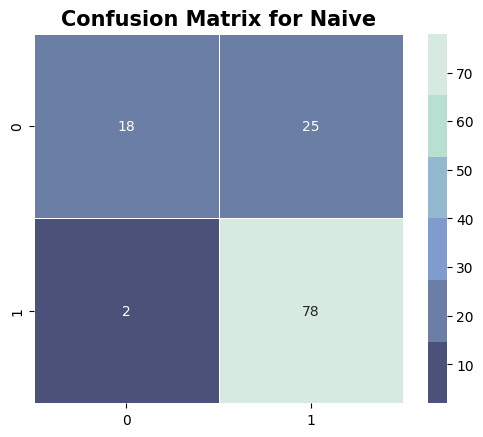

In [28]:
# Gráfica da matrix confusion
# ==============================================================================
from sklearn.metrics import confusion_matrix
cmNB = confusion_matrix(y_test, ypredNB)
sns.heatmap (cmNB,cmap = cmap, annot = True, square = True,
             linewidths =.5).set_title('Confusion Matrix for Naive',
                                       fontdict={'size': 15, 'weight': 'bold'})
plt.show()

Naive Bayes model provides 0.78 de accuracy, in other words, 78.0 % of our predictions will be correct

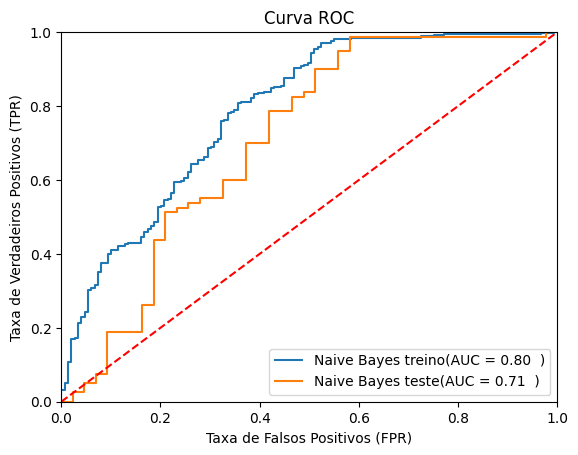

In [29]:
# Calcula as probabilidades previstas pelo modelo
# ====================================================================
from sklearn.metrics import roc_curve, roc_auc_score
ypredNB = modelNB.predict_proba(X_train)[:, 1]
y_pred_probNB = modelNB.predict_proba(X_test)[:, 1]



# Calcula a curva ROC
# ======================================================================
fprNBtrain, tprNBtrain, thresholdsNBtrain = roc_curve(y_train,ypredNB )
fprNB, tprNB, thresholdsNB = roc_curve(y_test, y_pred_probNB)



# Calcula a área sob a curva ROC (AUC-ROC score)
# ======================================================================
auc_scoreNBtrain = roc_auc_score(y_train, ypredNB)
auc_scoreNB = roc_auc_score(y_test, y_pred_probNB)



# Grafica a curva ROC
#========================================================================
plt.plot(fprRLtrain, tprRLtrain, label='Naive Bayes treino(AUC = %0.2f  )' % auc_scoreNBtrain)
plt.plot(fprNB, tprNB, label='Naive Bayes teste(AUC = %0.2f  )' % auc_scoreNB)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.xlabel('Taxa de Falsos Positivos (FPR)')
plt.ylabel('Taxa de Verdadeiros Positivos (TPR)')
plt.title('Curva ROC')
plt.legend(loc="lower right")
plt.show()

## Decision Tree

### Encontrando o melhor modelo

In [30]:
# Looking for the more optimized model, in order to reach that we will useTree using gridsearchCV
# ==============================================================================
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

params = {'criterion': ['entropy', 'gini'], 'max_depth': [5, 6, 7, 8, 9, 10], 'min_samples_leaf': [1,3, 4, 5, 7, 9]}
gs = GridSearchCV(DecisionTreeClassifier(), params, cv=10, n_jobs=-1, verbose=1)
gs.fit(X_train, y_train)

print('Score:',gs.best_score_,'\nParameters:', gs.best_params_)

best_classifier = gs.best_estimator_
best_classifier

Fitting 10 folds for each of 72 candidates, totalling 720 fits
Score: 0.8146122448979594 
Parameters: {'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 4}


DecisionTreeClassifier(max_depth=5, min_samples_leaf=4)

### Construindo o modelo (max_depth = 5, min_samples_leaf = 4)

In [31]:
# Construindo o modelo com os parâmetros encontrados anteriormente
# criterion = "gini",  max_depth = 5, min_samples_leaf= 3
# ==============================================================================
from sklearn.tree import DecisionTreeClassifier
modelDTC = DecisionTreeClassifier(criterion = "gini", max_depth = 5, min_samples_leaf =4)


# Treinando o modelo
# ==============================================================================
modelDTC.fit(X_train,y_train)


# Fazendo previsões
# ==============================================================================
ypredDTC = modelDTC.predict(X_test)

### Evaluando as métricas

In [32]:
# Evaluando o valor preditivo do modelo
# Importando as bibliotecas
# ==============================================================================
from sklearn import metrics
accDTC = accuracy_score(y_test,ypredDTC)
precisionDTC = precision_score(y_test, ypredDTC)
recallDTC = recall_score(y_test, ypredDTC)
f1DTC = f1_score(y_test,ypredDTC)
print('Accuracy_DTC: %.3f' %accDTC)
print('Precision_DTC: %.3f' %precisionDTC)
print('Recall_DTC: %.3f' %recallDTC)
print('F1-score_DTC : %.3f' %f1DTC)

Accuracy_DTC: 0.740
Precision_DTC: 0.750
Recall_DTC: 0.900
F1-score_DTC : 0.818


Text(0.5, 1.0, 'Confusion Matrix for D. Tree')

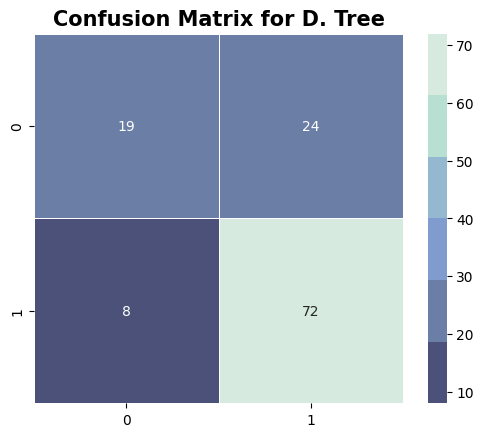

In [33]:
# Gráfica da matrix confusão
# ==============================================================================
cmDTC = confusion_matrix(y_test, ypredDTC)
sns.heatmap (cmDTC, cmap = cmap, annot = True, square = True, linewidths = .5).set_title(
    'Confusion Matrix for D. Tree', fontdict={'size': 15, 'weight': 'bold'})

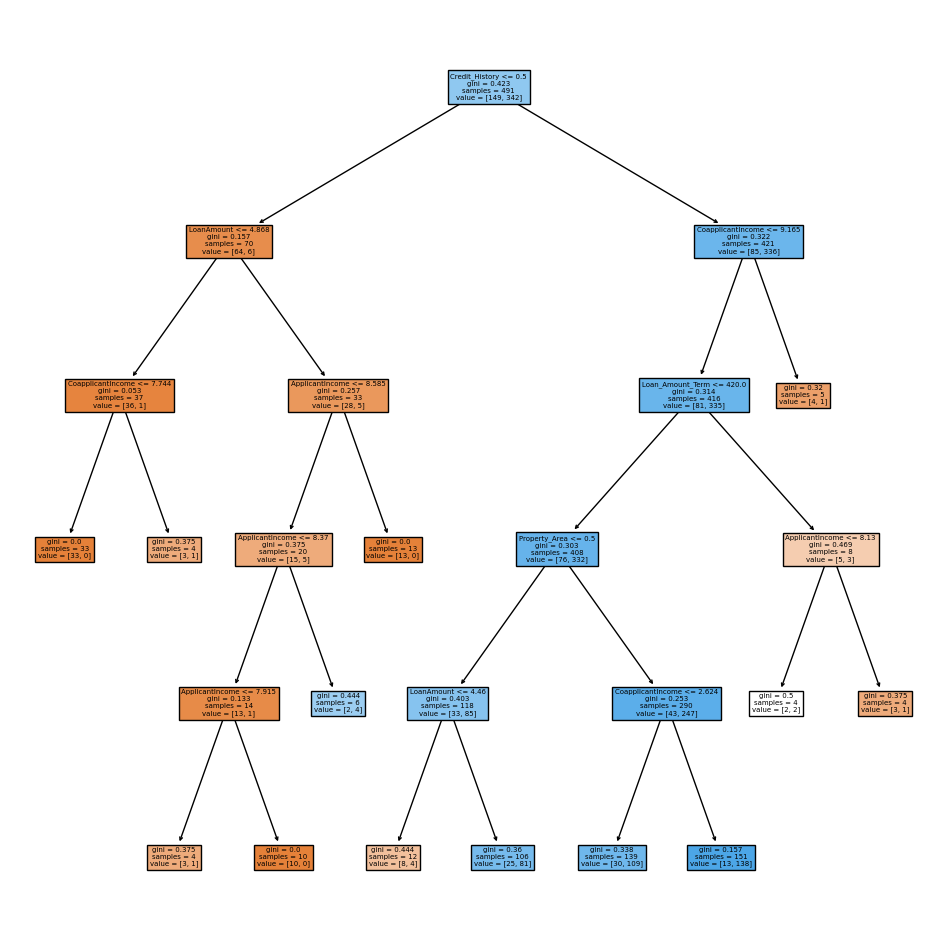

In [34]:
# Import library for drawing the tree
# ==============================================================================
from sklearn import tree
fig = plt.figure(figsize = (12,12))
tree.plot_tree(modelDTC,feature_names = datatrain.columns, filled = True)
plt.show()

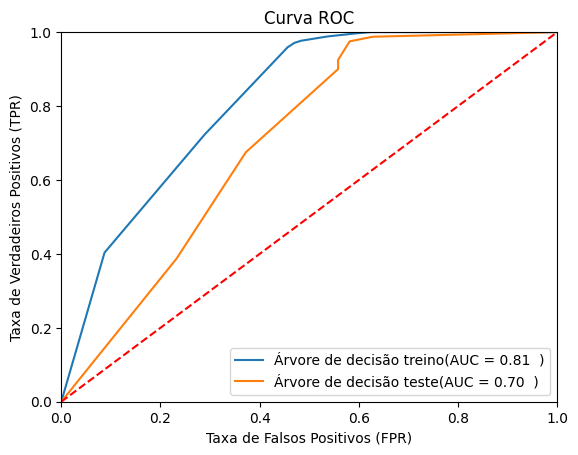

In [35]:
# Calcula as probabilidades previstas pelo modelo
# ====================================================================
from sklearn.metrics import roc_curve, roc_auc_score
ypredDTC = modelDTC.predict_proba(X_train)[:, 1]
y_pred_probDTC = modelDTC.predict_proba(X_test)[:, 1]



# Calcula a curva ROC
# ======================================================================
fprDTCtrain, tprDTCtrain, thresholdsDTCtrain = roc_curve(y_train,ypredDTC )
fprDTC, tprDTC, thresholdsDTC = roc_curve(y_test, y_pred_probDTC)



# Calcula a área sob a curva ROC (AUC-ROC score)
# ======================================================================
auc_scoreDTCtrain = roc_auc_score(y_train, ypredDTC)
auc_scoreDTC = roc_auc_score(y_test, y_pred_probDTC)



# Grafica a curva ROC
#========================================================================
plt.plot(fprDTCtrain, tprDTCtrain, label='Árvore de decisão treino(AUC = %0.2f  )' % auc_scoreDTCtrain)
plt.plot(fprDTC, tprDTC, label='Árvore de decisão teste(AUC = %0.2f  )' % auc_scoreDTC)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.xlabel('Taxa de Falsos Positivos (FPR)')
plt.ylabel('Taxa de Verdadeiros Positivos (TPR)')
plt.title('Curva ROC')
plt.legend(loc="lower right")
plt.show()

# Resultados e conclusões


O objetivo do projeto foi prever que clientes podem adquirir um emprestimo e quem não, basado em dados pessoais fornecidos no momento de prencher o formulário de inscrição on-line.
Na construção do projeto temos usado 3 modelos de clasificação: Regressão logistíca, Naive Bayes, é árvore de decisão. O reporte de cada um deles é o seguinte

* Regressão logistíca possue uma acuracia 0.785.
* Naive Bayes possue uma acuracia 0.780.
* Árvore de decisão possue uma acuracia 0.748, ese modelo possue os seguintes parâmetros criterion = "gini", max_depth= 5, min_samples_leaf = 3, esse parâmetros foram encontrados usando o método gridsearchCV.
* O modelo com melhor valor preditivo é o modelo de regressão logistíca.
* A área sob a curva ROC (AUC) é uma métrica mais confiável em casos de desequilibrio de clases, já que indica a capacidade do modelo para distinguir adecuadamente entre clases positivas e negativas. En este caso, o modelo de regressão linear possue um  AUC(teste) de 0.71.

# Referências

* [1] https://www.kaggle.com/datasets/sazid28/home-loan
* [2] https://scikit-learn.org/0.21/_downloads/scikit-learn-docs.pdf
* [3] https://www.kaggle.com/code/johanrenzosm/loan-predictions#References